# K-Means 

In [3]:
import pandas as pd
synth_all = pd.read_csv("synth_all.csv")

## Question 1a

In [4]:
import matplotlib.pyplot as plot

plot.scatter(x=synth_all.x1, y=synth_all.x2)

## Question 1b

I would put expect about 30 clusters

## Question 2a

In [5]:
from sklearn.cluster import KMeans 

In [6]:
kmeans = KMeans(n_clusters=30).fit(synth_all)

## Question 2b

In [8]:
from sklearn.mixture import GaussianMixture

## TODO: NEED TO PLOT THIS!
for n in range(28,34):
    gm = GaussianMixture(n_components=n).fit(synth_all)

    print '# Clusters: %i'%(n)
    print 'AIC: %i'%(gm.aic(synth_all))
    print 'BIC: %i'%(gm.bic(synth_all))

# Clusters: 28
AIC: 35483
BIC: 36491
# Clusters: 29
AIC: 35438
BIC: 36483
# Clusters: 30
AIC: 35399
BIC: 36480
# Clusters: 31
AIC: 35368
BIC: 36485
# Clusters: 32
AIC: 35360
BIC: 36513
# Clusters: 33
AIC: 35269
BIC: 36458


## Question 2c

31 Clusters is optimal under AIC. 30 is optimal under BIC. This approximately matches my visual inspection.

# K-Nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier
synth_train = pd.read_csv("synth_train.csv")
synth_valid = pd.read_csv("synth_valid.csv")
synth_test = pd.read_csv("synth_test.csv")

## Question 1a

In [19]:
import re as regex
training_X = synth_train.filter(regex=regex.compile('x'))
training_y = synth_train.filter(regex=regex.compile('y')).y
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_X, training_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Question 1b

26

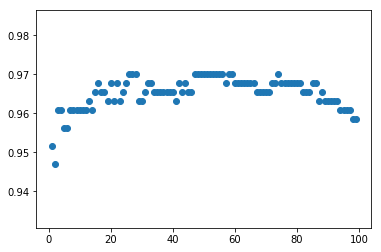

In [27]:
accuracy = []

validation_X = synth_valid.filter(regex=regex.compile('x'))
validation_y = synth_valid.filter(regex=regex.compile('y')).y

training_X = synth_train.filter(regex=regex.compile('x'))
training_y = synth_train.filter(regex=regex.compile('y')).y

for n in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(training_X, training_y)
    accuracy.append(knn.score(validation_X, validation_y))

plot.scatter(x=range(1,100), y=accuracy)
max_accuracy = max(accuracy)
best_k = accuracy.index(max_accuracy) + 1
best_k

Best value of k is 26 (may be tied with others. If tied, it is the lowest value of k among the tied.)

## Question 1c

In [28]:
test_X = synth_valid.filter(regex=regex.compile('x'))
test_y = synth_valid.filter(regex=regex.compile('y')).y

training_X = synth_train.filter(regex=regex.compile('x'))
training_y = synth_train.filter(regex=regex.compile('y')).y

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(training_X, training_y)
knn.score(test_X, test_y)

0.9700460829493087

97.0046%

# Decision Tree Classification